# Electronic device sales analysis

## Data importation

Due to the data are separated by month, all the files are merged into one file

In [86]:
import pandas as pd 
import os

files=os.listdir('./SalesData')

df=pd.DataFrame()

for file in files:
    df=pd.concat([df,pd.read_csv('./SalesData/'+file)])

df.to_csv("all_data.csv",index=False)

df= pd.read_csv('all_data.csv')

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## Clean data

Delete the 'nan and 'or' values.

In [87]:
df=df.dropna(how='any')

#df=df[df['Order Date'].str[0:2] != 'Or'] two different ways to do it.
df=df.loc[df['Order Date'].str[0:2] != 'Or']

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


## Month sales analysis

In [88]:
# creating month column
df['Month']=df['Order Date'].apply(lambda x: int(x.split(' ')[0].split('/')[0])) 

# passing 'Quantity Ordered' and 'Price Each' columns to int and float respectively.
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')
df['Price Each']=df['Price Each'].astype('float')

# total sales column created by multiply the Quantity Ordered with Price Each
df['Sales']=df['Price Each']*df['Quantity Ordered']

df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


In [89]:
month_sales=df.groupby(['Month']).sum()['Sales']
print(month_sales)

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64


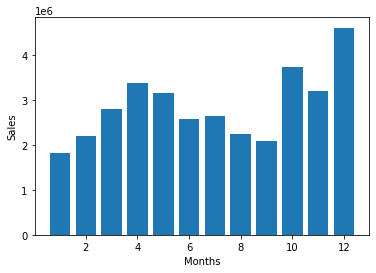

In [90]:
# visualization
import matplotlib.pyplot as plt

plt.figure()
plt.bar(month_sales.index,month_sales)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

December(12) was the month with highest sales, it could be beacuse it is a epoch where people usually spend more money. 

## City with highest sales

In [91]:
# creating city column
df['City']=df['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])
df.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas TX
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles CA
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City NY
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City NY
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles CA


In [92]:
city_sales=df.groupby(['City']).sum()['Sales']
print(city_sales)


City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64


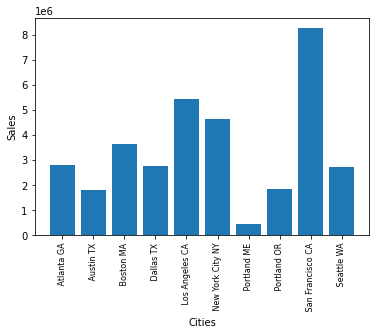

In [93]:
# visualization
plt.figure()
plt.bar(city_sales.index,city_sales)
plt.xlabel('Cities')
plt.xticks(city_sales.index,rotation='vertical',size=8)
plt.ylabel('Sales')
plt.show()

The city with highest sales is San Francisco CA

## ¿What hours are better to advertise?

In [94]:
# creating hour column

#import datetime as dt      # datetime way
# df['Order Date']=pd.to_datetime(df['Order Date']) 
# df['Hour']=df['Order Date'].dt.hour

df['Hour']=df['Order Date'].apply(lambda x: x.split(' ')[0].split('/')[0])
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas TX,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles CA,10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City NY,10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City NY,10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles CA,10


this should be based on Order ID, because are separated by product, then, there are duplicated orders for the same buyer.

In [95]:
# first way was take duplicated order values, preserve one and concat with another dataframe with the individual orders
# that could get problems, so I use drop_duplicated
#df_dup= df[df['Order ID'].duplicated(keep=False)]
#df_dup=pd.DataFrame(df_dup.groupby('Order ID')['Hour'].apply(lambda x: ','.join(x).split(',')[0]))

df_drop = df.drop_duplicates(subset='Order Date', keep="first")
df_drop.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99,Dallas TX,10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99,Los Angeles CA,10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98,New York City NY,10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99,New York City NY,10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99,Los Angeles CA,10


In [96]:
# now create a count column to obtain puchases number by hour
df_drop['Count']=1
hours_sales=df_drop.groupby(['Hour']).count()['Count']
print(hours_sales)

Hour
01     8099
02     9615
03    11784
04    13574
05    12674
06    10741
07    11349
08     9734
09     9489
10    14847
11    13188
12    17301
Name: Count, dtype: int64


<ipython-input-96-b2d2c3047787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop['Count']=1


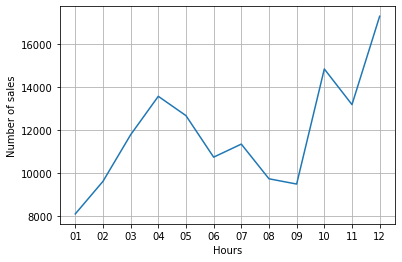

In [97]:
# Visualization
plt.figure()
plt.plot(hours_sales.index,hours_sales)
plt.xlabel('Hours')
plt.ylabel('Number of sales')
plt.grid()
plt.show()

December was the month with highest sales, followed closely for november, october and april.

## Products to sell together

In [98]:
# duplicated orders indicates products that were sold together
df_dup= df[df['Order ID'].duplicated(keep=False)] 
df_dup=pd.DataFrame(df_dup.groupby('Order ID')['Product'].apply(','.join)) 
df_dup['Count']=1
product_sales=df_dup.groupby(['Product']).count().sort_values('Count',ascending=False)['Count']
print(product_sales)

Product
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
                                                     ... 
LG Dryer,27in FHD Monitor                               1
LG Dryer,27in 4K Gaming Monitor                         1
Google Phone,Wired Headphones,USB-C Charging Cable      1
Google Phone,Wired Headphones,Macbook Pro Laptop        1
iPhone,iPhone                                           1
Name: Count, Length: 366, dtype: int64


## Product sales quantity

In [99]:
df['Count']=1
products_sales=df.groupby(['Product']).sum()['Quantity Ordered']
print(products_sales)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32


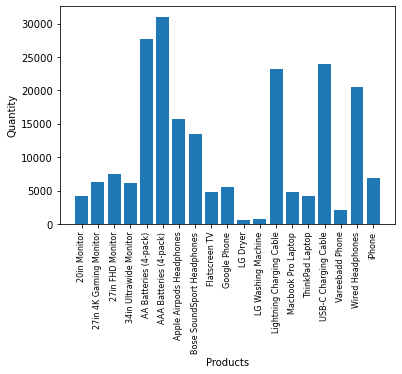

In [100]:
# visualization
plt.figure()
plt.bar(products_sales.index,products_sales) 
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.xticks(products_sales.index,rotation='vertical',size=8)
plt.show()